In [161]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.ML.Descriptors.Descriptors import DescriptorCalculator
import numpy as np
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors

from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [ ]:
chosen_descriptors = [
    'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
    'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
    'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
    'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 
    'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
    'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
    'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 
    'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
    'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O',
    'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde',
    'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine',
    'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
    'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
    'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone',
    'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
    'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime',
    'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid',
    'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd',
    'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed'
]


In [160]:
some_descriptors = [
'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'RingCount', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9'
]


# Read

## SMILES

In [13]:
smi_file = "../data/derived/compounds_desalt.smi"
smiles = []
ind_names = []
smiles_dict = {}
with open(smi_file, 'r') as iFile:
    for i, s in enumerate(iFile):
        S = s.strip().split()
        smiles.append([S[0], i])
        ind_names.append(S[1])
        smiles_dict[S[1]] = S[0]
print(len(smiles_dict), len(smiles))
all_mols = []
for i in tqdm(list(smiles_dict)):
    m = Chem.MolFromSmiles(smiles_dict[i])
    m.SetProp("_Name",i)
    all_mols.append(m)

## SDF

In [145]:
suppl = Chem.SDMolSupplier('../data/derived/compounds_desalt_3d.sdf')

In [148]:
mols = [x for x in suppl]


In [155]:
print(len(mols))
m  = mols[-122]

101018


# Trials

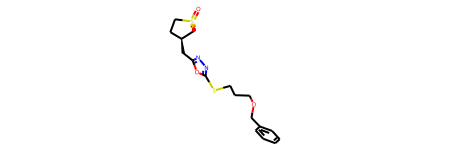

In [156]:
# m = Chem.MolFromSmiles('C1OCCC1c1c(Br)nc(O)cc1CC(=O)OCc1cnoc1')
m

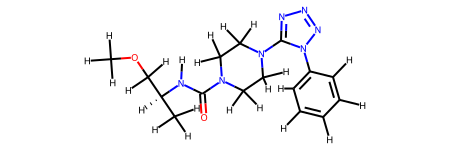

In [34]:
m2=Chem.AddHs(m)
m2

In [36]:
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)

0

1

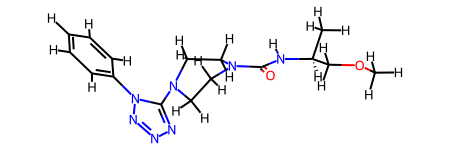

In [38]:
m2

In [40]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [94]:
chosen_descriptors = [
    'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
    'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
    'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
    'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 
    'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
    'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
    'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 
    'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
    'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O',
    'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde',
    'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine',
    'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
    'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
    'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone',
    'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
    'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime',
    'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid',
    'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd',
    'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed'
]


In [76]:
# Descriptors.MinAbsPartialCharge(m)
# rdMolDescriptors.CalcFractionCSP3(all_mols[3])
# Descriptors.rdMolDescriptors.CalcCrippenDescriptors(all_mols[3])

# create molecular descriptor calculator



In [84]:
smi_based = np.array(list(mol_descriptor_calculator.CalcDescriptors(m)))

ff_based = np.array(list(mol_descriptor_calculator.CalcDescriptors(m2)))

In [92]:
mask = np.abs((smi_based - ff_based)/(ff_based+0.01)) > 0.2

In [93]:
np.array(chosen_descriptors)[mask]

array(['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v',
       'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4',
       'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'Ipc',
       'Kappa1', 'MinAbsEStateIndex', 'MinEStateIndex',
       'NumRotatableBonds', 'PEOE_VSA11', 'PEOE_VSA9', 'SMR_VSA1',
       'SlogP_VSA5', 'SlogP_VSA7', 'VSA_EState1', 'VSA_EState2',
       'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
       'VSA_EState8', 'VSA_EState9'], dtype='<U24')

In [164]:
from rdkit.Chem import Descriptors3D 

In [173]:
rdMolDescriptors.CalcEEMcharges(m)

[-0.48669210711907757,
 0.4459014050316848,
 0.17432060863163903,
 0.09487810758513822,
 -0.1928889728215644,
 1.7593844452462053,
 -0.7596227156678086,
 -0.7806651678463541,
 -0.15360405702718608,
 -0.28741905329643636,
 -0.3642508441774166,
 0.1846778377771272,
 0.06691576638150175,
 0.021814933192089946,
 -0.013562185031219457,
 0.019565974133514734,
 0.07055516999145969,
 0.06680329895009536,
 -0.23470419516986935,
 1.9413147767393457,
 -0.7929656523541619,
 -0.8273447801463525,
 -0.6177527784474159,
 0.19232355735521586,
 0.1591778901706453,
 -0.4257287060808825,
 0.18583800033629558,
 0.2256204374437061,
 0.157711308961033,
 -0.022315466789723577,
 0.013693338251351082,
 0.005697274629477061,
 0.012771097794954707,
 -0.07764090486203533,
 0.11173232044018114,
 0.06942395088817402,
 0.057036086906669205]

# Compute descriptors

## Generate 3D

In [157]:
# TODO it later 
all_mols_modif = []
for m in tqdm(mols):
    m2 = Chem.AddHs(m)
    AllChem.EmbedMolecule(m2)
    # AllChem.MMFFOptimizeMolecule(m2)
    AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)
    all_mols_modif.append(m2)

  0%|          | 468/101018 [00:47<2:51:46,  9.76it/s]


KeyboardInterrupt: 

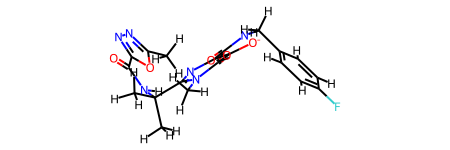

In [158]:
all_mols_modif[50]

## Calc descr

In [162]:
mol_descriptor_calculator = MolecularDescriptorCalculator(some_descriptors)
all_des = []

for m in tqdm(mols):
    d = list(mol_descriptor_calculator.CalcDescriptors(m))
    all_des.append(d)
all_des = np.array(all_des)

100%|██████████| 101018/101018 [04:58<00:00, 338.93it/s]


In [175]:
df_des = pd.DataFrame(all_des)
df_des.columns = some_descriptors

In [176]:
df_des.shape

(101018, 65)

In [136]:
# ind_names

In [177]:
df_des.dropna(axis=1, inplace=True)
df_des['Id'] = ind_names

In [178]:
df_des.to_csv('../data/derived/rdkit_3d_des.csv', index=False)
